## kNN Classification

This project applies a K-Nearest Neighbors (KNN) classification model to a breast cancer dataset.  
The model is trained using two selected features: `'mean area'` and `'mean compactness'`, with the target variable being `'diagnosis'`.  


In [3]:
import numpy as np
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [5]:
# Load breast cancer dataset 
data_cancer = pd.read_csv('data_cancer.csv')

# Display the first 5 records
data_cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# Display the information of dataframe named as 'data_cancer'
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# Make the two columns named as 'X' and 'y'.
X = data_cancer[['mean_area', 'mean_compactness']]
y = data_cancer[['diagnosis']]

In [8]:
# Place the DataFrames side by side
data_cancer1 = pd.concat([X, y], axis = 1)

# Display the 5 rows for the modified dataframe.
data_cancer1.head()

,mean_area,mean_compactness,diagnosis
0,1001.0,0.27760,0
1,1326.0,0.07864,0
2,1203.0,0.15990,0
3,386.1,0.28390,0
4,1297.0,0.13280,0


In [9]:
# Display the number of rows and columns of the dataframe.
data_cancer1.shape

(569, 3)

In [10]:
# Check the presence of the null values inthe dataframe.
data_cancer1.isnull().sum()

mean_area           0
mean_compactness    0
diagnosis           0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

# Call the method train_test_split() to splot the data based on the specific split
# We use a specific split test_size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Create and initialise an object knn by calling a method called as 'KNeighborsClassifier'.
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

# Call the fit() method to train the model based on the trainig data
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [13]:
# Predict the alues based on the testing data
y_pred = knn.predict(X_test)

Display the scatter plot for the diagnosis as [0, 1] for the two columns, <b>mean_area</b> and <b>mean_compactness</b>.

<Axes: xlabel='mean_area', ylabel='mean_compactness'>

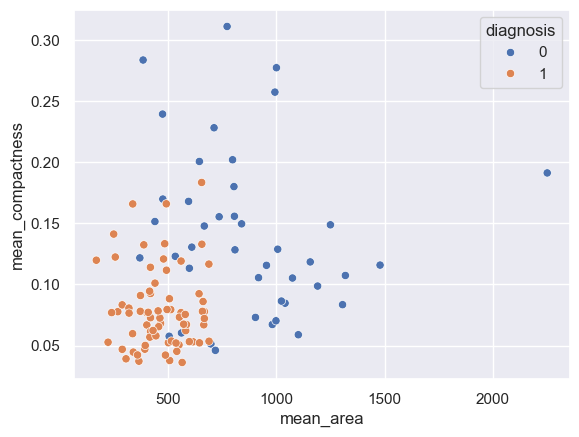

In [15]:
import seaborn as sns
sns.set()

sns.scatterplot(
    x = 'mean_area',
    y = 'mean_compactness',
    hue = 'diagnosis',
    data = X_test.join(y_test, how = 'outer')
)

<Axes: >

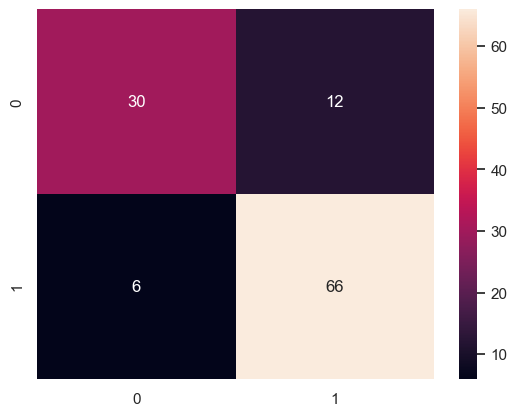

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Call a method predict by using an object classifier 'cls_svm'
y_predict = knn.predict(X_test)

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

In [17]:
from sklearn.metrics import classification_report

# Display the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        42
           1       0.85      0.92      0.88        72

    accuracy                           0.84       114
   macro avg       0.84      0.82      0.82       114
weighted avg       0.84      0.84      0.84       114



Using hyperparameters to find the optimal value of neighbours based on different training and testing sizes of data.

In [19]:
import numpy as np
neighbors = np.arange(1, 11)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))      # Declare and initialise the matrix

In [20]:
for i, k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 10
    kNN = KNeighborsClassifier(n_neighbors = k)            # Initialise an object knn using KNeighborsClassifier method

    # Fit the model
    kNN.fit(X_train, y_train)                              # Call fit method to implement the ML KNeighborsClassifier model

    # Compute accuracy on the training set
    train_accuracy[i] = kNN.score(X_train, y_train)        # Save the score value in the train_accuracy array

    # Compute accuracy on the test set
    test_accuracy[i] = kNN.score(X_test, y_test)           # Save the score value in the train_accuracy array

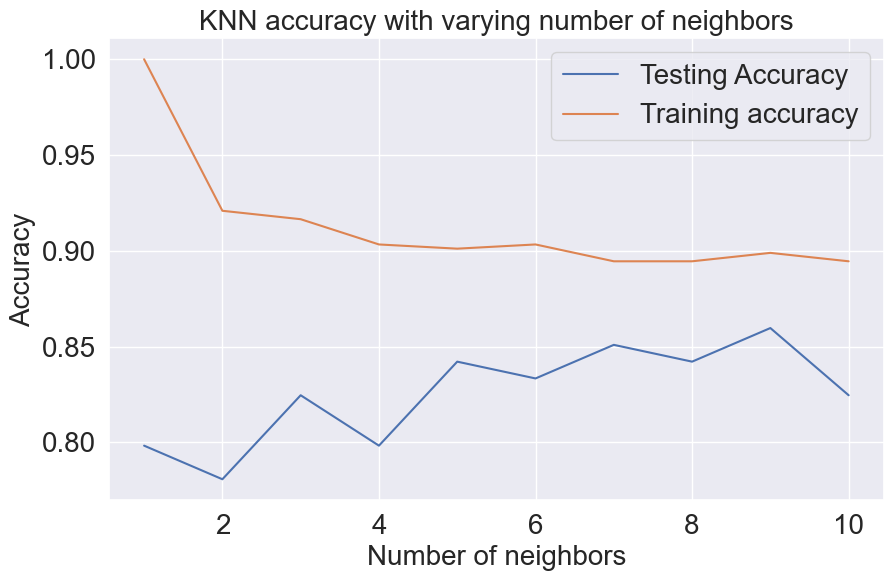

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()